<a href="https://colab.research.google.com/github/Em-Esh-Magar/AI-ML-Learning/blob/main/Logistic_Regression/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/Titanic-Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data = df['Ticket'].value_counts
data

<bound method IndexOpsMixin.value_counts of 0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object>

In [8]:
details = df['Fare'].describe()

In [9]:
df['Fare'].value_counts

<bound method IndexOpsMixin.value_counts of 0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64>

In [10]:
import matplotlib.pyplot as plt


In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
def age_classification(age):
    if age<2:
        return "infant"
    elif age<4:
        return "toddler"
    elif age<13:
        return "Child"
    elif age<20:
        return "Teen"
    elif age<40:
        return "Young Adult"
    elif age<75:
        return "Adult"
    else:
        return "Senior"

In [13]:
df['Age Category'] = df['Age'].apply(age_classification)
df['Age Category']

,Age Category
0,Young Adult
1,Young Adult
2,Young Adult
3,Young Adult
4,Young Adult
...,...
886,Young Adult
887,Teen
888,Senior
889,Young Adult


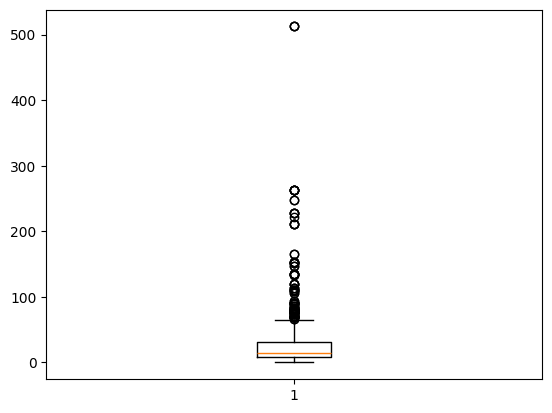

In [14]:
plt.boxplot(df['Fare'])
plt.show()

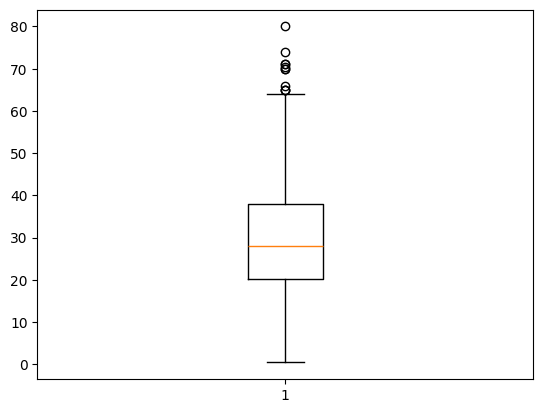

In [15]:
plt.boxplot(df['Age'].dropna())
plt.show()

In [16]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


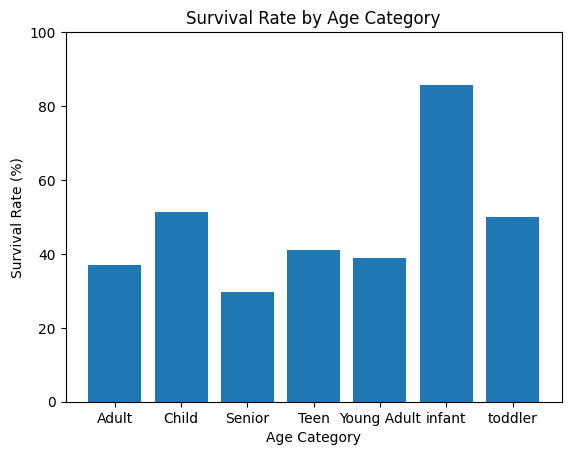

In [17]:
# Calculate survival rate by age category
total_by_age = df.groupby('Age Category')['Survived'].count()
survived_by_age = df[df['Survived'] == 1].groupby('Age Category')['Survived'].count()
survival_rate = (survived_by_age / total_by_age) * 100

# Plot survival rate
plt.bar(survival_rate.index, survival_rate.values)
plt.xlabel('Age Category')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Age Category')
plt.ylim(0, 100)  # Set y-axis from 0 to 100%
plt.show()

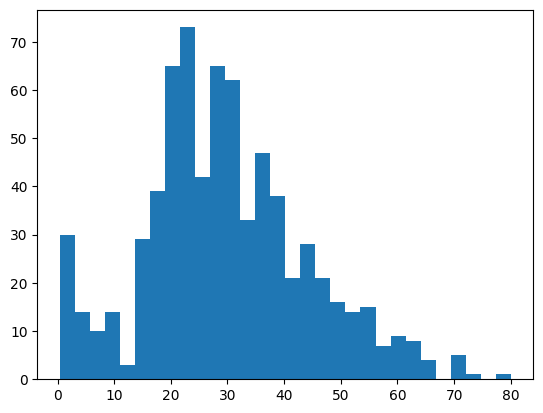

In [18]:
plt.hist(df['Age'].dropna(),bins=30)
plt.show()

In [19]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [20]:
df['Embarked'].value_counts

<bound method IndexOpsMixin.value_counts of 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object>

In [21]:
df.dropna(subset=['Embarked'],inplace=True)  #inplace ley yei variable mai save garxa


In [22]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [23]:
df['Embarked'].value_counts

<bound method IndexOpsMixin.value_counts of 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 889, dtype: object>

In [24]:
df['Cabin'].value_counts()

,count
Cabin,
C23 C25 C27,4
G6,4
B96 B98,4
F33,3
E101,3
...,...
E17,1
A24,1
C50,1


In [25]:
df['Cabin'] = df['Cabin'].fillna('UNKNOWN')

In [26]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   889 non-null    int64  
 1   Survived      889 non-null    int64  
 2   Pclass        889 non-null    int64  
 3   Name          889 non-null    object 
 4   Sex           889 non-null    object 
 5   Age           889 non-null    float64
 6   SibSp         889 non-null    int64  
 7   Parch         889 non-null    int64  
 8   Ticket        889 non-null    object 
 9   Fare          889 non-null    float64
 10  Cabin         889 non-null    object 
 11  Embarked      889 non-null    object 
 12  Age Category  889 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 97.2+ KB


In [ ]:
# df['Col'].unique() --> yo herdai nominal or ordinal value find garne
# We represent by
# 1. ordinal = 0,1,2..... feri order ma hunu parxa jastai small, medium, large
# 2. nominal= one hot encoding jastai hamro binary bata ma represent garxa jastai small = 1,0,0 medium = 0,1,0 large = 0,0,1

In [ ]:
#Name - N,
#sex - N can be yes or no
#Ticket - N
#Cabin - O
#Embarked - N

In [28]:
df['Sex'] = df['Sex'].apply(lambda x:1 if x=='male' else 0)

In [29]:
df['Sex'].value_counts()

,count
Sex,
1,577
0,312


In [30]:
df['Cabin'].unique()

array(['UNKNOWN', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'C83', 'F33', 'F G73',
       'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69',
       'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32',
       'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87',
       'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49',
       'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66',
       'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128',
       'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       

In [31]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

### High cardinal bhayera hami ley cabin lai pani nominal nai use garxam one hot encoding

In [32]:
# One hot encoding process

df_encoded = pd.get_dummies(df, columns=['Embarked','Ticket'], dtype=int)

In [33]:
df_encoded.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,...,Ticket_STON/O2. 3101290,Ticket_SW/PP 751,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,UNKNOWN,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,UNKNOWN,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,...,0,0,0,0,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,UNKNOWN,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df_encoded.drop(columns=['Name'],inplace=True)

In [35]:
df_encoded['Cabin'] = df_encoded['Cabin'].apply(lambda x: x.strip()[0] if x!='UNKONWN' else x)

In [36]:
df['Cabin'].unique()

array(['UNKNOWN', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'C83', 'F33', 'F G73',
       'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69',
       'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32',
       'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87',
       'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49',
       'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66',
       'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128',
       'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       

In [37]:
df_encoded['Cabin'] = df_encoded['Cabin'].replace({'U':"Unknown"})

In [38]:
df_encoded['Cabin'].unique()

array(['Unknown', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [39]:
order = ['Unknown', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T']
my_encoder = OrdinalEncoder(categories=[order],dtype=int)

df_encoded['Cabin'] = my_encoder.fit_transform(df_encoded[['Cabin']])

In [40]:
df['Cabin']

,Cabin
0,UNKNOWN
1,C85
2,UNKNOWN
3,C123
4,UNKNOWN
...,...
886,UNKNOWN
887,B42
888,UNKNOWN
889,C148


In [41]:
df['Cabin'].value_counts()

,count
Cabin,
UNKNOWN,687
C23 C25 C27,4
G6,4
B96 B98,4
F33,3
...,...
E17,1
A24,1
C50,1


In [42]:
df_encoded.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Age Category,...,Ticket_STON/O2. 3101290,Ticket_SW/PP 751,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735
0,1,0,3,1,22.0,1,0,7.2500,0,Young Adult,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,38.0,1,0,71.2833,1,Young Adult,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,Young Adult,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,0,35.0,1,0,53.1000,1,Young Adult,...,0,0,0,0,0,0,0,0,0,0
4,5,0,3,1,35.0,0,0,8.0500,0,Young Adult,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Columns: 693 entries, PassengerId to Ticket_WE/P 5735
dtypes: float64(2), int64(690), object(1)
memory usage: 4.7+ MB


In [44]:
df_encoded.drop(columns=['Age Category'],inplace = True)

In [71]:
df_encoded.to_csv('/content/Titanic-preprocessing.csv',index=False)

In [72]:
df_encoded

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,...,Ticket_STON/O2. 3101290,Ticket_SW/PP 751,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735
0,1,0,3,1,22.0,1,0,7.2500,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,38.0,1,0,71.2833,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,0,35.0,1,0,53.1000,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,3,1,35.0,0,0,8.0500,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,0,0,...,0,0,0,0,0,0,0,0,0,0
887,888,1,1,0,19.0,0,0,30.0000,6,0,...,0,0,0,0,0,0,0,0,0,0
888,889,0,3,0,28.0,1,2,23.4500,0,0,...,0,0,0,0,1,0,0,0,0,0
889,890,1,1,1,26.0,0,0,30.0000,1,1,...,0,0,0,0,0,0,0,0,0,0


In [73]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [74]:
input_data= df_encoded.drop(columns=['Survived'])
actual_label = df_encoded[['Survived']]

In [75]:
input_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,...,Ticket_STON/O2. 3101290,Ticket_SW/PP 751,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735
0,1,3,1,22.0,1,0,7.2500,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,38.0,1,0,71.2833,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,3,0,26.0,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,35.0,1,0,53.1000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3,1,35.0,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,1,27.0,0,0,13.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
887,888,1,0,19.0,0,0,30.0000,6,0,0,...,0,0,0,0,0,0,0,0,0,0
888,889,3,0,28.0,1,2,23.4500,0,0,0,...,0,0,0,0,1,0,0,0,0,0
889,890,1,1,26.0,0,0,30.0000,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
model.fit(input_data,actual_label)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [81]:
test_data = pd.read_csv('/content/Titanic-preprocessing.csv')

In [82]:
test_data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,...,Ticket_STON/O2. 3101290,Ticket_SW/PP 751,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,...,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.649044,29.315152,0.524184,0.382452,32.096681,0.799775,0.188976,...,0.001125,0.001125,0.001125,0.001125,0.002250,0.004499,0.001125,0.001125,0.001125,0.002250
std,256.998173,0.486260,0.834700,0.477538,12.984932,1.103705,0.806761,49.697504,1.800388,0.391710,...,0.033539,0.033539,0.033539,0.033539,0.047404,0.066964,0.033539,0.033539,0.033539,0.047404
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,668.000000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,8.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
test_data = test_data.drop(columns=['Survived'])

In [84]:
result = model.predict(test_data)
result

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,